#Загрузка библиотек и данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rand_st = 12

In [ ]:
# Загрузка данных из гугл диска
# from google.colab import drive
# drive.mount('/content/gdrive/')
# data = pd.read_parquet('/content/gdrive/My Drive/Colab Notebooks/hackaton/dataset/train.parquet')

Mounted at /content/gdrive/


In [3]:
#Если загружать данные локально:
data = pd.read_parquet('train.parquet')

#Работа с данными

Изменение типов данных для категориальных признаков:

In [4]:
cat_cols = [
    'channel_code', 'city', 'city_type',
    'index_city_code', 'ogrn_month', 'ogrn_year',
    'branch_code', 'okved', 'segment'
]

In [5]:
data[cat_cols] = data[cat_cols].astype("category")

Массивы с признаками, которые будут позже удалены из обучающей выборки для улучшения результата ROC-AUC:

In [6]:
cols_for_del_t1 = ['channel_code', 'city', 'city_type', 'index_city_code',
                'ogrn_month', 'ogrn_year', 'branch_code'
                ]

In [7]:
cols_for_del_t2 = ['channel_code', 'city', 'index_city_code',
                'ogrn_month', 'ogrn_year', 'branch_code', 'ft_registration_date',
                 'min_end_fact_fin_deals', 'min_end_plan_non_fin_deals',
                'min_start_fin_deals', 'min_start_non_fin_deals', 'ogrn_days_end_month',
                'balance_amt_min'
]

#Графики

##--Корреляция

In [ ]:
#получается слишком большая матрица корреляции, нужно сократить количество признаков
#и только после этого строить матрицу

# Построим матрицу корреляции между признаками
correlation_matrix = data.corr()

# Визуализируем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(500, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=10.5)
plt.title('Матрица корреляции')
plt.show()

Меньшая матрица корреляции с некоторыми признаками:

In [ ]:
data2= pd.DataFrame()

In [ ]:
data2['channel_code'] = data['channel_code']

In [ ]:
data2['city'] = data['city']
data2['city_type'] = data['city_type']
data2['index_city_code'] = data['index_city_code']
data2['ogrn_month'] = data['ogrn_month']
data2['ogrn_year'] = data['ogrn_year']
data2['branch_code'] = data['branch_code']
data2['okved'] = data['okved']
data2['segment'] = data['segment']
data2['target_1'] = data['target_1']
data2['target_2'] = data['target_2']
data2['total_target'] = data['total_target']


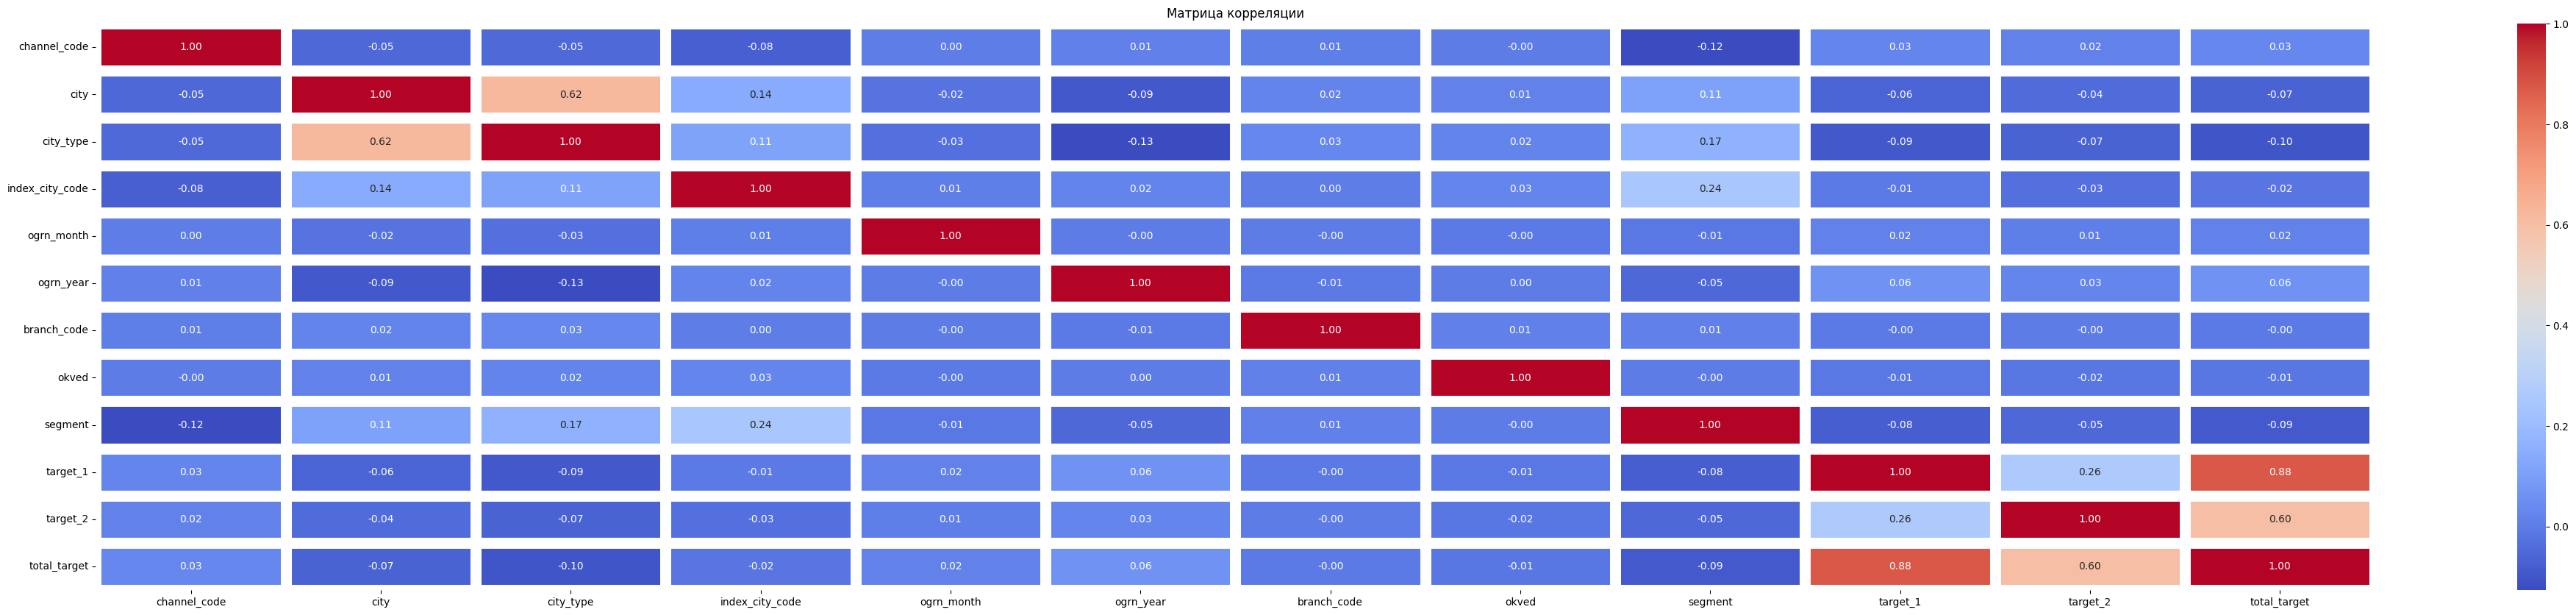

In [ ]:
# Построим матрицу корреляции между признаками
correlation_matrix = data2.corr()

# Визуализируем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(50, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=10.5)
plt.title('Матрица корреляции')
plt.show()

##--boxplot

In [ ]:
import seaborn as sns
import warnings

массивы с признаками для большей комфортности построения графиков:

In [ ]:
features = ['rko_start_months', 'max_end_fact_fin_deals', 'max_end_plan_non_fin_deals',
            'max_start_fin_deals', 'max_start_non_fin_deals',   'min_end_fact_fin_deals',
            'min_end_plan_non_fin_deals', 'min_start_fin_deals', 'min_start_non_fin_deals']

In [ ]:
features_2 = ['balance_amt_avg', 'balance_amt_max', 'balance_amt_min', 'balance_amt_day_avg', 'channel_code']

In [ ]:
features_3 = ['city', 'city_type', 'index_city_code', 'ogrn_days_end_month', 'ogrn_days_end_quarter', 'ogrn_month', 'ogrn_year', 'branch_code']

In [ ]:
features_4 = ['ft_registration_date', 'max_founderpres', 'min_founderpres', 'ogrn_exist_months', 'okved', 'segment', 'sum_of_paym_2m', 'sum_of_paym_6m', 'sum_of_paym_1y']

In [ ]:
features_5 = ['sum_a_oper_1m', 'cnt_a_oper_1m', 'sum_b_oper_1m', 'cnt_b_oper_1m', 'sum_c_oper_1m', 'cnt_c_oper_1m', 'sum_deb_d_oper_1m',
              'cnt_deb_d_oper_1m', 'sum_cred_d_oper_1m', 'cnt_cred_d_oper_1m', 'sum_deb_e_oper_1m', 'cnt_deb_e_oper_1m']

Строим boxplot для конкретного признака и target_2:

<Axes: xlabel='target_2', ylabel='segment'>

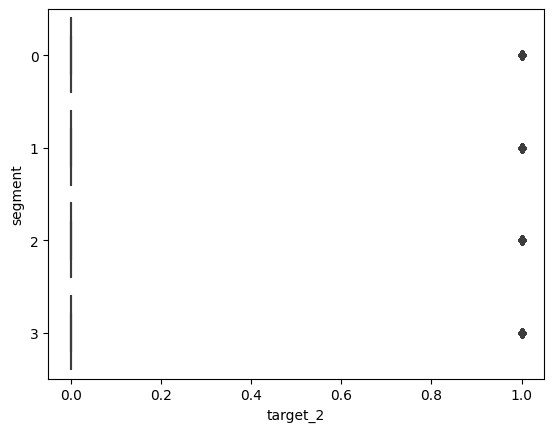

In [ ]:
sns.boxplot(x='target_2', y=features_4[5], data=data)

<Axes: xlabel='target_1', ylabel='max_end_fact_fin_deals'>

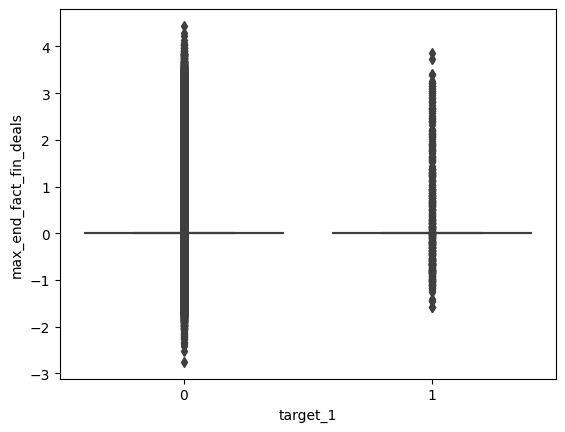

In [ ]:
sns.boxplot(x='target_1', y=features[1], data=data)

#Обучение модели

## подготовка данных, загрузка библиотек

In [20]:
from sklearn.model_selection import train_test_split

y = data['target_1'].copy()

X = data.drop(['id','target_1','target_2','total_target']+cols_for_del_t1, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=rand_st)

In [9]:
from sklearn.metrics import roc_auc_score

##-- LGBMClassifier

In [10]:
from lightgbm import LGBMClassifier

In [21]:
model_t1 = LGBMClassifier(verbosity=-1, random_state=rand_st, max_depth=7, n_estimators=300, reg_alpha=8, reg_lambda=4, subsample_for_bin=200000, n_jobs=5) #дает 0.926979205864384 на ROC-AUC

In [22]:
#model = LGBMClassifier(verbosity=-1, random_state=rand_st) #первая попытка настроить модель, дает 0.9259780630845078 на ROC-AUC, позже решили добавить больше параметров для улучшения
model_t1.fit(X_train, y_train)

LGBMClassifier(max_depth=7, n_estimators=300, n_jobs=5, random_state=12,
               reg_alpha=8, reg_lambda=4, verbosity=-1)

In [23]:
y_pred = model_t1.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.926979205864384

In [24]:
y_targets = pd.DataFrame()

In [25]:
y_targets['target_1'] = y_pred

In [26]:
y_t2 = data['target_2'].copy()

X_t2 = data.drop(['id','target_1','target_2','total_target']+cols_for_del_t2, axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_t2, y_t2, train_size=0.8, random_state=rand_st)

In [33]:
model_t2 = LGBMClassifier(verbosity=-1, random_state=rand_st)
model_t2.fit(X_train2, y_train2)

LGBMClassifier(random_state=12, verbosity=-1)

In [34]:
y_pred2 = model_t2.predict_proba(X_test2)[:, 1]
roc_auc_score(y_test2, y_pred2)

0.7704014002928301

In [35]:
y_targets['target_2'] = y_pred2

In [36]:
def max_of(first, second):
  if first > second:
    return first
  else:
    return second

In [37]:
y3 = data['total_target'].copy()

X3 = data.drop(['id','target_1','target_2','total_target'], axis=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size=0.8, random_state=rand_st)

In [38]:
y_targets['total_target'] = y_targets.apply(lambda row: max_of(row['target_1'],row['target_2']),axis=1)

In [39]:
roc_auc_score(y_test3, y_targets['total_target'])

0.8826948011077262

## Предсказание на тестовой выборке

In [ ]:
# Загрузка данных из гугл диска

# test = pd.read_parquet('/content/gdrive/My Drive/Colab Notebooks/hackaton/dataset/test.parquet')

In [40]:
#если файлы загружать из локального пространства:
test = pd.read_parquet('test.parquet')

In [41]:
test[cat_cols] = test[cat_cols].astype("category")

In [42]:
y_pred = model_t1.predict_proba(test.drop(['id']+cols_for_del_t1,axis=1))[:,1]

In [43]:
test["target_1"] = y_pred

In [44]:
y_pred2 = model_t2.predict_proba(test.drop(['id']+cols_for_del_t2+['target_1'],axis=1))[:,1]

In [45]:
test["target_2"] = y_pred2

In [46]:
test["score"] = test.apply(lambda row: max_of(row['target_1'],row['target_2']),axis=1)
test

,id,rko_start_months,max_end_fact_fin_deals,max_end_plan_non_fin_deals,max_start_fin_deals,max_start_non_fin_deals,min_end_fact_fin_deals,min_end_plan_non_fin_deals,min_start_fin_deals,min_start_non_fin_deals,...,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,target_1,target_2,score
0,300000,-1.076009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.323487,-0.169940,-0.316563,-0.639934,-0.171600,-0.237763,-0.596108,0.239773,0.116931,0.239773
1,300001,-0.335070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.323487,-0.169940,-0.316563,-0.639934,-0.171580,-0.222361,-0.517805,0.588462,0.072011,0.588462
2,300002,0.920834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.323487,-0.169940,-0.316563,-0.639934,0.020943,-0.160754,-0.204596,0.001277,0.009397,0.009397
3,300003,-0.772897,-0.740714,NaN,-0.635375,NaN,-0.595302,NaN,-0.738424,NaN,...,-0.323487,-0.137993,-0.277545,-0.381706,-0.171600,-0.237763,-0.596108,0.002957,0.008996,0.008996
4,300004,-0.665342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.323487,-0.139926,-0.277545,-0.381706,-0.158918,-0.222361,-0.517805,0.001362,0.008017,0.008017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,399995,-0.462181,-0.655619,NaN,-0.615833,NaN,0.252559,NaN,-0.269155,NaN,...,-0.188287,0.035977,-0.258035,-0.317149,-0.060968,-0.068343,0.108614,0.005551,0.008324,0.008324
99996,399996,1.162020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188287,-0.169707,-0.258035,-0.446263,-0.077180,0.024067,0.265219,0.005213,0.010665,0.010665
99997,399997,-0.277489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.323487,-0.169940,-0.316563,-0.639934,-0.171600,-0.237763,-0.596108,0.008084,0.023262,0.023262
99998,399998,-0.743564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.323487,-0.169940,-0.316563,-0.639934,-0.142708,-0.022138,0.421823,0.005990,0.034808,0.034808


##Сохранение ответа

In [47]:
submiss = pd.DataFrame()

In [48]:
submiss['id'] = test['id'].copy()

In [49]:
submiss['score'] = test['score'].copy()

In [ ]:
# Сохранение данных на гугл диск
#submiss.to_csv('/content/gdrive/My Drive/Colab Notebooks/hackaton/dataset/prediction_maxT12_881.csv',index=False)

In [50]:
#Сохранение файла локально
submiss.to_csv('prediction_maxT12_881.csv',index=False)